# DATA SCIENCE INTERN - @CodeAlpha


# TASK:- 3 Leaf Disease Detection

# Name: Ayush Singh

## 1. Importing Packages:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from tensorflow.keras.utils import to_categorical

## 2. Image Checking

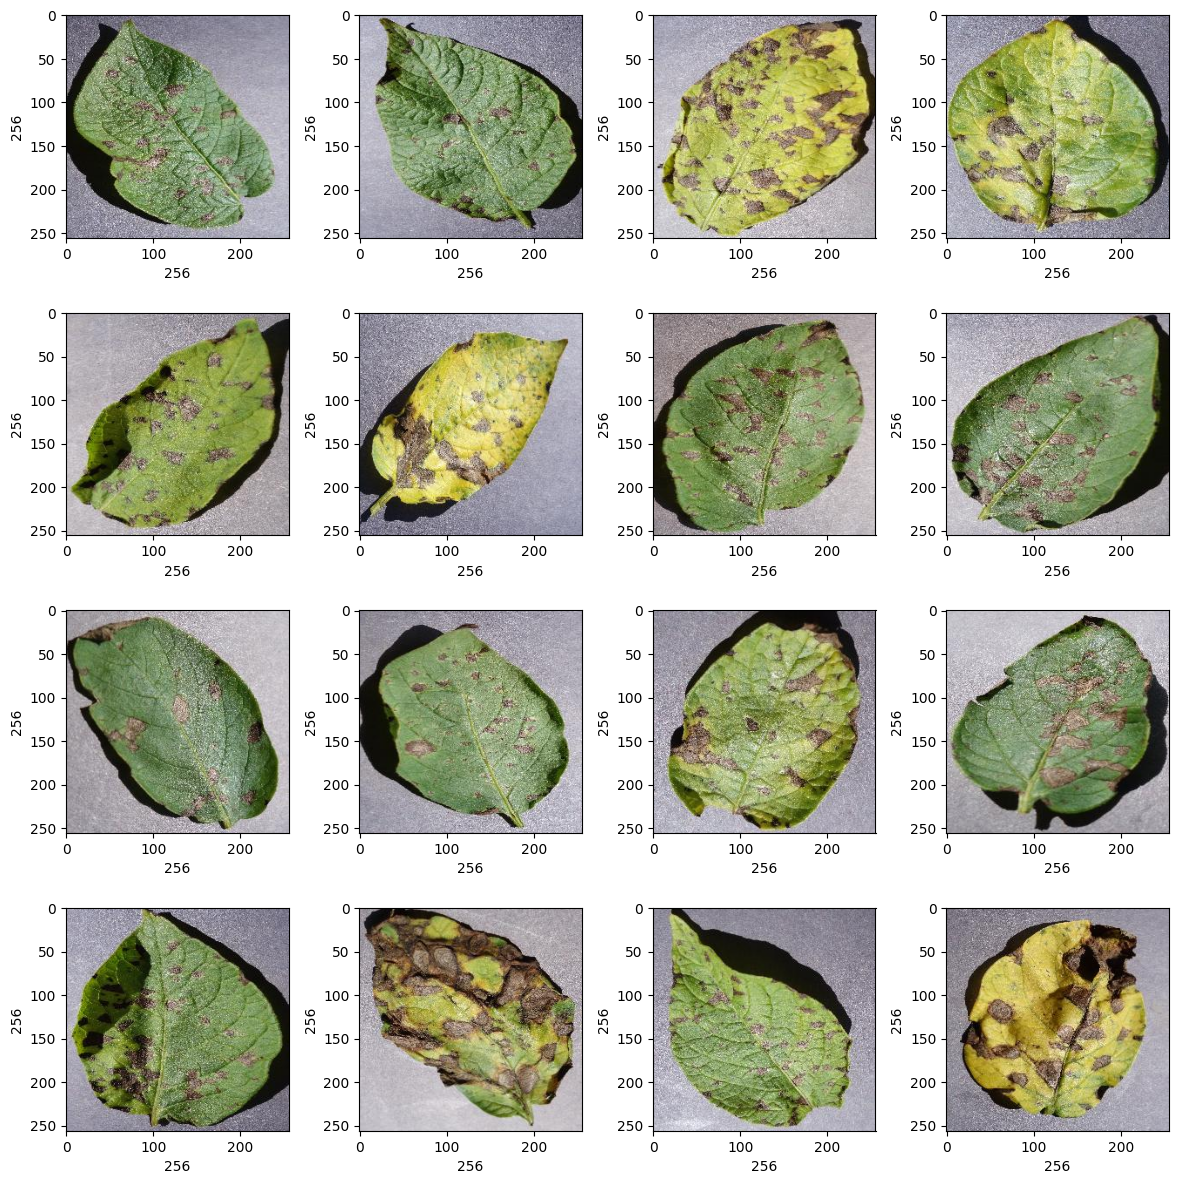

In [3]:
# Plotting 12 images to check dataset
# Now we will observe some of the iamges that are their in our dataset. We will plot 12 images here using the matplotlib library.
plt.figure(figsize=(12,12))
path = "/content/local_dataset/leaf-image-dataset/Plant_images/Potato___Early_blight"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10) # width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10) # height of image

After visualizing the images let us move forward and create a function which will convert the images into a numpy array. It is required because we will normalize our dataset after this.

## 3. Conversion of Images into Array:

In [4]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [5]:
dir = "/content/local_dataset/leaf-image-dataset/Plant_images"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1
for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])


In [6]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()


0    300
1    300
2    300
dtype: int64

In [7]:
image_list[0].shape

(256, 256, 3)

In [8]:
label_list = np.array(label_list)
label_list.shape

(900,)

## 4. Train-Test-Split:

In [9]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)

## 5. Normalizing the dataset:

In [10]:
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 256,256,3)
x_test = x_test.reshape( -1, 256,256,3)

In [11]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## 6. Customize CNN Model:

Next, we will create a network architecture for the model using various types of layers, each selected for its specific features:

Conv2D: This layer creates a convolutional kernel that is convolved with the input layer to produce the output tensor.

MaxPooling2D: This downsampling technique extracts the maximum value over the window defined by the pool size.

Flatten: This layer flattens the input to create a 1D output.

Dense: This layer produces the output as the dot product of the input and the kernel.

In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 85, 85, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 42, 42, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 8)                 2

While compiling the model, we need to set the type of loss to Binary Crossentropy. Additionally, we must specify the optimizer and metrics for the model.

In [13]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

In [14]:
# split the dataset into validation and training data.
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

## 7. Model Training:

In [15]:
# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs,
                    validation_data = (x_val, y_val))

Epoch 1/50
5/5 [==============================] - 9s 628ms/step - loss: 1.0435 - accuracy: 0.4965 - val_loss: 0.9545 - val_accuracy: 0.6389
Epoch 2/50
5/5 [==============================] - 1s 145ms/step - loss: 0.9443 - accuracy: 0.6424 - val_loss: 0.8761 - val_accuracy: 0.6736
Epoch 3/50
5/5 [==============================] - 1s 186ms/step - loss: 0.8640 - accuracy: 0.6545 - val_loss: 0.8041 - val_accuracy: 0.6736
Epoch 4/50
5/5 [==============================] - 1s 186ms/step - loss: 0.7973 - accuracy: 0.6580 - val_loss: 0.7486 - val_accuracy: 0.6806
Epoch 5/50
5/5 [==============================] - 1s 154ms/step - loss: 0.7446 - accuracy: 0.6580 - val_loss: 0.7088 - val_accuracy: 0.6806
Epoch 6/50
5/5 [==============================] - 1s 141ms/step - loss: 0.7057 - accuracy: 0.6580 - val_loss: 0.6736 - val_accuracy: 0.6806
Epoch 7/50
5/5 [==============================] - 1s 142ms/step - loss: 0.6747 - accuracy: 0.6580 - val_loss: 0.6452 - val_accuracy: 0.6806
Epoch 8/50
5/5 [====

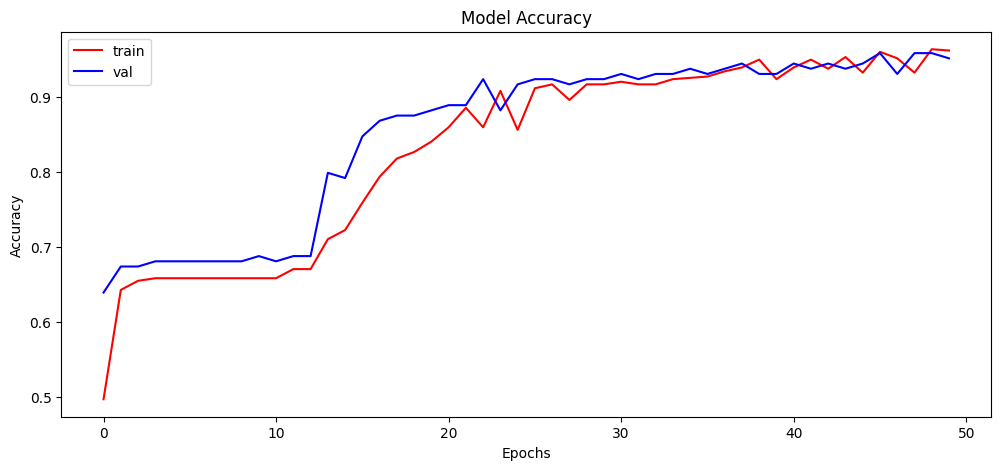

In [16]:
# Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [17]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
6/6 [==============================] - 1s 54ms/step - loss: 0.3684 - accuracy: 0.9333
Test Accuracy: 93.33333373069763


## 8. Model Prediction:

In [18]:
y_pred = model.predict(x_test)

6/6 [==============================] - 0s 16ms/step


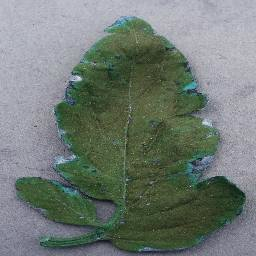

In [19]:
img = array_to_img(x_test[10])
img

In [20]:
print("Originally : ",all_labels[np.argmax(y_test[10])])
print("Predicted : ",all_labels[np.argmax(y_pred[10])])

Originally :  Potato-Early_blight
Predicted :  Potato-Early_blight


# The dataset is available at Kaggle:
### https://www.kaggle.com/code/hamedetezadi/leaf-disease-prediction-using-cnn/input

# THANK YOU..!!😊